## Import Libraries..!!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Read data from csv file..!!

In [3]:
my_data = pd.read_csv('Classified Data', index_col = 0)
my_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
class_data = pd.DataFrame(my_data)
class_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Data Wrangling / Data Cleaning..!!

In [5]:
class_data.shape

(1000, 11)

In [6]:
class_data.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [7]:
class_data.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

In [8]:
class_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

<AxesSubplot:>

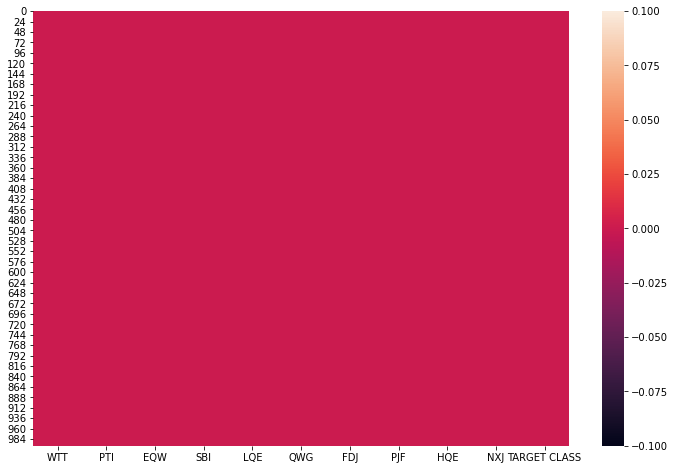

In [10]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(class_data.isnull())

## Standardize the Variables..

### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
st_scaler = StandardScaler()

In [13]:
st_scaler.fit(class_data.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [14]:
features = st_scaler.fit_transform(class_data.drop('TARGET CLASS', axis = 1))

In [15]:
features_df = pd.DataFrame(features, columns = class_data.columns[:-1])
features_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
features_df.shape

(1000, 10)

## Apply train test split..!!

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = features
y = class_data['TARGET CLASS']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Now, apply K Nearest Neighbor Algorithm..!!

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model = KNeighborsClassifier(n_neighbors = 2)

In [22]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
y_pred = knn_model.predict(x_test)

## Predictions & Evaluations..!!

In [24]:
print(confusion_matrix(y_test, y_pred))

[[98  3]
 [10 89]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       101
           1       0.97      0.90      0.93        99

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



## Model Accuracy..!!

In [44]:
model_acc = knn_model.score(x_test, y_test)
print('KNN Model Accuracy:', model_acc * 100, '%')

KNN Model Accuracy: 95.5 %


## Now, select the K Value..!!

In [26]:
error_rate = []

for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_y_pred = knn_model.predict(x_test)
    error_rate.append(np.mean(knn_y_pred != y_test))

## Elbow Method..!!

Text(0, 0.5, 'Error Rate')

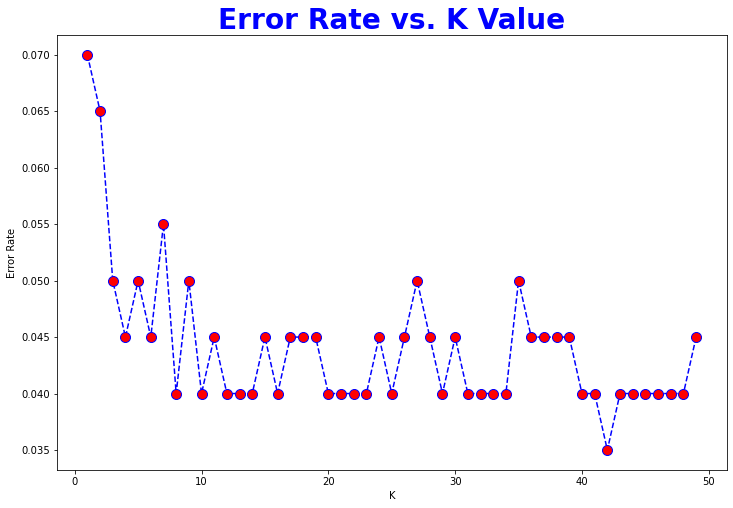

In [49]:
fig = plt.figure(figsize = (12, 8))
plt.plot(range(1, 50), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value', fontsize = 28, color = 'blue', fontweight = 'bold')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Check evaluation when k = 1..!!

In [31]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

knn_model.fit(x_train, y_train)
k_pred = knn_model.predict(x_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, k_pred))
print('\n')
print(classification_report(y_test, k_pred))

WITH K = 1


[[95  6]
 [ 8 91]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       101
           1       0.94      0.92      0.93        99

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [45]:
one_k_train_accuracy = knn_model.score(x_train, y_train)
print('K = 1 Training Accuracy:', one_k_train_accuracy * 100, '%')

one_k_test_accuracy = knn_model.score(x_test, y_test)
print('K = 1 Test Accuracy:', one_k_test_accuracy * 100, '%')

K = 1 Training Accuracy: 93.25 %
K = 1 Test Accuracy: 95.5 %


## Check evaluation when k = 24..!!

In [39]:
knn_model = KNeighborsClassifier(n_neighbors = 24)

knn_model.fit(x_train, y_train)
k_pred = knn_model.predict(x_test)

print('WITH K = 24')
print('\n')
print(confusion_matrix(y_test, k_pred))
print('\n')
print(classification_report(y_test, k_pred))

WITH K = 24


[[96  5]
 [ 4 95]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       101
           1       0.95      0.96      0.95        99

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



In [46]:
twentyfour_k_train_accuracy = knn_model.score(x_train, y_train)
print('K = 10 Training Accuracy:', twentyfour_k_train_accuracy * 100, '%')

twentyfour_k_test_accuracy = knn_model.score(x_test, y_test)
print('K = 24 Test Accuracy:', twentyfour_k_test_accuracy * 100, '%')

K = 10 Training Accuracy: 93.25 %
K = 24 Test Accuracy: 95.5 %


# THE END..!!